In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../dataset/Lasso_Undersampling.csv',encoding='CP949')

In [4]:
df.columns

Index(['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]재고자산증가율', '[제조]매출액순이익률',
       '[제조]매입채무회전기간', '[제조]재고자산회전기간', '[제조]순운전자본회전률', '[제조]현금비율',
       '[제조]자기자본배율', '[제조]노동소득분배율', 'label'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
lasso_X = df.iloc[:,:-1]
lasso_y = df['label']
lasso_x_train, lasso_x_test, lasso_y_train, lasso_y_test = train_test_split(lasso_X, lasso_y, test_size=0.2, random_state=0)

In [6]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(lasso_x_train,lasso_y_train)
lda_pred = lda_clf.predict(lasso_x_test)
lda_pred_proba = lda_clf.predict_proba(lasso_x_test)

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(lasso_x_train, lasso_y_train)
dt_pred = dt_clf.predict(lasso_x_test)
dt_pred_proba = dt_clf.predict_proba(lasso_x_test)

In [71]:
#디시전트리 하이퍼파라미터 구하기
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2, 3,4,5,6,7,8], #7개
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(lasso_x_train, lasso_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 2, 'min_samples_leaf': 13}, 최적 평균 정확도 :0.934


In [9]:

#최적 하이퍼 파라미터 :{'max_depth': 2, 'min_samples_leaf': 13}, 최적 평균 정확도 :0.934
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 2,min_samples_leaf=13)     
dt_clf_best.fit(lasso_x_train, lasso_y_train)
dt_best_pred = dt_clf_best.predict(lasso_x_test)
dt_best_pred_proba = dt_clf_best.predict_proba(lasso_x_test)

In [10]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(lasso_x_train, lasso_y_train)
rf_pred = rf_clf.predict(lasso_x_test)
rf_pred_proba = rf_clf.predict_proba(lasso_x_test)

In [74]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [1,2,4,6,7,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [7,8,9],
               'min_samples_split': [7,8,9],
               'n_estimators': [10,20,40,60]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(lasso_x_train,lasso_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 10}, 최적 평균 정확도 :0.936


In [11]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 10}, 최적 평균 정확도 :0.937
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'gini', max_features= 'sqrt',
                                     max_depth=2, min_samples_leaf=9, min_samples_split=9, n_estimators=10)
rf_clf_best.fit(lasso_x_train, lasso_y_train)
rf_best_pred = rf_clf_best.predict(lasso_x_test)
rf_best_pred_proba = rf_clf_best.predict_proba(lasso_x_test)

In [12]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(lasso_x_train, lasso_y_train)
lr_pred = lr_clf.predict(lasso_x_test)
lr_pred_proba = lr_clf.predict_proba(lasso_x_test)


In [77]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,3,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(lasso_x_train,lasso_y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.923


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/

In [13]:
# 최적 하이퍼 파라미어:{'C': 00.1, 'penalty': 'l2'}, 최적 평균 정확도:0.920
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(lasso_x_train, lasso_y_train)
lr_best_pred = lr_clf.predict(lasso_x_test)
lr_best_pred_proba = lr_clf.predict_proba(lasso_x_test)

In [14]:
# KNN 모형 구현
from sklearn.neighbors import KNeighborsClassifier
# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(lasso_x_train, lasso_y_train)
# 예측
knn_pred = knn_clf.predict(lasso_x_test)
knn_pred_proba = knn_clf.predict_proba(lasso_x_test)


In [15]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(lasso_x_train, lasso_y_train)
    knn_pred = knn_clf.predict(lasso_x_test)
    knn_score=accuracy_score(lasso_y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.9220055710306406
2
0.9387186629526463
3
0.9415041782729805
4
0.935933147632312
5
0.935933147632312
6
0.9415041782729805
7
0.9415041782729805
8
0.9387186629526463
9
0.935933147632312
10
0.9387186629526463


In [16]:
# knn 최적의 파라미터 모델 7에서 제일 높음
knn_clf = KNeighborsClassifier(n_neighbors=7)
# 분류기 학습
knn_clf.fit(lasso_x_train, lasso_y_train)
# 예측

knn_best_pred = knn_clf.predict(lasso_x_test)
knn_best_pred_proba = knn_clf.predict_proba(lasso_x_test)


In [17]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
lasso_x_train2 = lasso_x_train.copy()
lasso_x_test2 = lasso_x_test.copy()
lasso_y_train2 = lasso_y_train.copy()
lasso_y_test2 = lasso_y_test.copy()
lasso_x_train2.columns = [['총자본증가율',
 '자기자본증가율',
 '재고자산증가율',
 '매출액순이익률',
 '매입채무회전기간',
 '재고자산회전기간',
 '순운전자본회전률',
 '현금비율',
 '자기자본배율',
 '노동소득분배율']]
lasso_x_test2.columns =[['[제조]총자본증가율',
 '자기자본증가율',
 '재고자산증가율',
 '매출액순이익률',
 '매입채무회전기간',
 '재고자산회전기간',
 '순운전자본회전률',
 '현금비율',
 '자기자본배율',
 '노동소득분배율']]

params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(lasso_x_train2, lasso_y_train2, verbose = True)


xgb_pred = xgb_wrapper.predict(lasso_x_test2)
xgb_pred_proba = xgb_wrapper.predict_proba(lasso_x_test2)


[15:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [83]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[40,43,46,50],
          'learning_rate':[0.03,0.04, 0.05, 0.06],
          'max_depth' : [2,3,4]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(lasso_x_train2,lasso_y_train2)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

[17:40:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:40:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:40:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboos

In [18]:

#최적 하이퍼 파라미어:{'learning_rate': 0.03, 'max_depth': 1, 'n_estimators': 40}, 최적 평균 정확도:0.934
xgb_wrapper = XGBClassifier(learning_rate= 0.03, max_depth= 3, n_estimators= 40)

xgb_wrapper.fit(lasso_x_train2, lasso_y_train2, verbose = True)

xgb_best_pred = xgb_wrapper.predict(lasso_x_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(lasso_x_test)

In [20]:
lasso_y_train.reset_index(drop=True, inplace=True)
lasso_y_test.reset_index(drop=True, inplace=True)
lasso_x_train.reset_index(drop=True, inplace=True)
lasso_x_test.reset_index(drop=True, inplace=True)

In [21]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(lasso_x_train, lasso_y_train)
pc_pred = pc_clf.predict(lasso_x_test)






In [23]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(lasso_x_train, lasso_y_train)
    pc_pred = pc_clf.predict(lasso_x_test)
    
    pc_scores=accuracy_score(lasso_y_test, pc_pred)
    print(i)
    print(pc_scores)


1
0.8913649025069638
2
0.9136490250696379
3
0.9136490250696379
4
0.8941504178272981
5
0.9025069637883009
6
0.9108635097493036
7
0.8941504178272981
8
0.8690807799442897
9
0.9052924791086351
10
0.8857938718662952


In [24]:

pc_clf = Perceptron(n_iter = 2)
pc_clf.fit(lasso_x_train, lasso_y_train)
pc_best_pred = pc_clf.predict(lasso_x_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [39]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(logi_y_test, pred):
    confusion = confusion_matrix(lasso_y_test, pred)
    accuracy = accuracy_score(lasso_y_test, pred)
    precision = precision_score(lasso_y_test, pred)
    recall = recall_score(lasso_y_test, pred)
    roc_score = roc_auc_score(lasso_y_test, pred)
    pr_score = average_precision_score(lasso_y_test, pred)
    f1 = f1_score(lasso_y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(lasso_y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(lasso_y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(lasso_y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(lasso_y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(lasso_y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(lasso_y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(lasso_y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(lasso_y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(lasso_y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(lasso_y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(lasso_y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(lasso_y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(lasso_y_test, pc_best_pred))



lda
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
None
디시전트리
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
None
디시전트리 최적의 모델
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
None
랜덤포레스트
오차행렬
[[328   4]
 [ 14  13]]
정확도: 0.9499, 정밀도 : 0.7647, 재현율:0.4815,F1 스코어:0.5909
ROC 스코어: 0.7347, PR score : 0.4072
None
랜덤포레스트 최적의 모델
오차행렬
[[329   3]
 [ 18   9]]
정확도: 0.9415, 정밀도 : 0.7500, 재현율:0.3333,F1 스코어:0.4615
ROC 스코어: 0.6621, PR score : 0.3001
None
로지스틱
오차행렬
[[329   3]
 [ 13  14]]
정확도: 0.9554, 정밀도 : 0.8235, 재현율:0.5185,F1 스코어:0.6364
ROC 스코어: 0.7547, PR score : 0.4632
None
로지스틱회귀 최적의 모델
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
None
Knn
오차행렬
[[329   3]
 [ 19   8]]
정확도: 0.9387, 정밀도 : 0.7273, 재현율:0.2963,F1 스코어:0.4211
ROC 스코어: 0.64

In [26]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(lasso_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(lasso_y_test, custom_predict)

get_eval_by_threshold(lasso_y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(logi_y_test , lda_pred[:,1].reshape(-1,1), thresholds)

# LDA
#임계값 최적 : 재현율기준(0.1)/f1기준(0.4)


임곗값: 0.1
오차행렬
[[309  23]
 [  9  18]]
정확도: 0.9109, 정밀도 : 0.4390, 재현율:0.6667,F1 스코어:0.5294
ROC 스코어: 0.7987, PR score : 0.3178
임곗값: 0.2
오차행렬
[[313  19]
 [  9  18]]
정확도: 0.9220, 정밀도 : 0.4865, 재현율:0.6667,F1 스코어:0.5625
ROC 스코어: 0.8047, PR score : 0.3494
임곗값: 0.3
오차행렬
[[315  17]
 [ 10  17]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.6296,F1 스코어:0.5574
ROC 스코어: 0.7892, PR score : 0.3427
임곗값: 0.4
오차행렬
[[320  12]
 [ 10  17]]
정확도: 0.9387, 정밀도 : 0.5862, 재현율:0.6296,F1 스코어:0.6071
ROC 스코어: 0.7967, PR score : 0.3969
임곗값: 0.5
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
임곗값: 0.6
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
임곗값: 0.7
오차행렬
[[324   8]
 [ 12  15]]
정확도: 0.9443, 정밀도 : 0.6522, 재현율:0.5556,F1 스코어:0.6000
ROC 스코어: 0.7657, PR score : 0.3957
임곗값: 0.8
오차행렬
[[326   6]
 [ 14  13]]
정확도: 0.9443, 정밀도 : 0.6842, 재현율:0.4815,F1 스코어:0.5652
ROC 스코어: 0.7317, PR score : 0.3684
임곗값: 0.9

In [27]:
#디시전 트리 
# 성능값 일정
get_eval_by_threshold(lasso_y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
임곗값: 0.2
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
임곗값: 0.3
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
임곗값: 0.4
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
임곗값: 0.5
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
임곗값: 0.6
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
임곗값: 0.7
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
임곗값: 0.8
오차행렬
[[314  18]
 [ 12  15]]
정확도: 0.9164, 정밀도 : 0.4545, 재현율:0.5556,F1 스코어:0.5000
ROC 스코어: 0.7507, PR score : 0.2860
임곗값: 0.9

In [28]:
# 디시전트리 최적 
#임계값 최적 : 재현율기준(0.1)/f1기준(0.1)
get_eval_by_threshold(lasso_y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[294  38]
 [  7  20]]
정확도: 0.8747, 정밀도 : 0.3448, 재현율:0.7407,F1 스코어:0.4706
ROC 스코어: 0.8131, PR score : 0.2749
임곗값: 0.2
오차행렬
[[294  38]
 [  7  20]]
정확도: 0.8747, 정밀도 : 0.3448, 재현율:0.7407,F1 스코어:0.4706
ROC 스코어: 0.8131, PR score : 0.2749
임곗값: 0.3
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.4
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.5
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.6
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.9

In [29]:
#로지스틱 회귀
#임계값 최적 : 재현율기준(0.1)/f1기준(0.4)
get_eval_by_threshold(lasso_y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[282  50]
 [  4  23]]
정확도: 0.8496, 정밀도 : 0.3151, 재현율:0.8519,F1 스코어:0.4600
ROC 스코어: 0.8506, PR score : 0.2795
임곗값: 0.2
오차행렬
[[311  21]
 [  7  20]]
정확도: 0.9220, 정밀도 : 0.4878, 재현율:0.7407,F1 스코어:0.5882
ROC 스코어: 0.8387, PR score : 0.3808
임곗값: 0.3
오차행렬
[[319  13]
 [ 10  17]]
정확도: 0.9359, 정밀도 : 0.5667, 재현율:0.6296,F1 스코어:0.5965
ROC 스코어: 0.7952, PR score : 0.3846
임곗값: 0.4
오차행렬
[[327   5]
 [ 11  16]]
정확도: 0.9554, 정밀도 : 0.7619, 재현율:0.5926,F1 스코어:0.6667
ROC 스코어: 0.7888, PR score : 0.4821
임곗값: 0.5
오차행렬
[[329   3]
 [ 13  14]]
정확도: 0.9554, 정밀도 : 0.8235, 재현율:0.5185,F1 스코어:0.6364
ROC 스코어: 0.7547, PR score : 0.4632
임곗값: 0.6
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
임곗값: 0.7
오차행렬
[[331   1]
 [ 18   9]]
정확도: 0.9471, 정밀도 : 0.9000, 재현율:0.3333,F1 스코어:0.4865
ROC 스코어: 0.6652, PR score : 0.3501
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

In [30]:
# 로지 회귀 최적 파라미터
#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)
get_eval_by_threshold(lasso_y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[293  39]
 [  6  21]]
정확도: 0.8747, 정밀도 : 0.3500, 재현율:0.7778,F1 스코어:0.4828
ROC 스코어: 0.8302, PR score : 0.2889
임곗값: 0.2
오차행렬
[[317  15]
 [ 10  17]]
정확도: 0.9304, 정밀도 : 0.5312, 재현율:0.6296,F1 스코어:0.5763
ROC 스코어: 0.7922, PR score : 0.3623
임곗값: 0.3
오차행렬
[[324   8]
 [ 11  16]]
정확도: 0.9471, 정밀도 : 0.6667, 재현율:0.5926,F1 스코어:0.6275
ROC 스코어: 0.7842, PR score : 0.4257
임곗값: 0.4
오차행렬
[[329   3]
 [ 14  13]]
정확도: 0.9526, 정밀도 : 0.8125, 재현율:0.4815,F1 스코어:0.6047
ROC 스코어: 0.7362, PR score : 0.4302
임곗값: 0.5
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
임곗값: 0.6
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.7
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.8
오차행렬
[[331   1]
 [ 25   2]]
정확도: 0.9276, 정밀도 : 0.6667, 재현율:0.0741,F1 스코어:0.1333
ROC 스코어: 0.5355, PR score : 0.1190
임곗값: 0.9

In [31]:
#랜덤 포레스트
#임계값 최적 : 재현율기준(0.1)/f1기준(0.4)
get_eval_by_threshold(lasso_y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[282  50]
 [  5  22]]
정확도: 0.8468, 정밀도 : 0.3056, 재현율:0.8148,F1 스코어:0.4444
ROC 스코어: 0.8321, PR score : 0.2629
임곗값: 0.2
오차행렬
[[315  17]
 [  9  18]]
정확도: 0.9276, 정밀도 : 0.5143, 재현율:0.6667,F1 스코어:0.5806
ROC 스코어: 0.8077, PR score : 0.3679
임곗값: 0.3
오차행렬
[[321  11]
 [  9  18]]
정확도: 0.9443, 정밀도 : 0.6207, 재현율:0.6667,F1 스코어:0.6429
ROC 스코어: 0.8168, PR score : 0.4389
임곗값: 0.4
오차행렬
[[326   6]
 [ 10  17]]
정확도: 0.9554, 정밀도 : 0.7391, 재현율:0.6296,F1 스코어:0.6800
ROC 스코어: 0.8058, PR score : 0.4932
임곗값: 0.5
오차행렬
[[328   4]
 [ 14  13]]
정확도: 0.9499, 정밀도 : 0.7647, 재현율:0.4815,F1 스코어:0.5909
ROC 스코어: 0.7347, PR score : 0.4072
임곗값: 0.6
오차행렬
[[329   3]
 [ 17  10]]
정확도: 0.9443, 정밀도 : 0.7692, 재현율:0.3704,F1 스코어:0.5000
ROC 스코어: 0.6807, PR score : 0.3323
임곗값: 0.7
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.8
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.9

In [32]:
#랜덤 포레스트 최적 파라미터 
#임계값 최적 : 재현율기준(0.1)/f1기준(0.4)
get_eval_by_threshold(lasso_y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[287  45]
 [  5  22]]
정확도: 0.8607, 정밀도 : 0.3284, 재현율:0.8148,F1 스코어:0.4681
ROC 스코어: 0.8396, PR score : 0.2815
임곗값: 0.2
오차행렬
[[316  16]
 [ 10  17]]
정확도: 0.9276, 정밀도 : 0.5152, 재현율:0.6296,F1 스코어:0.5667
ROC 스코어: 0.7907, PR score : 0.3522
임곗값: 0.3
오차행렬
[[326   6]
 [ 13  14]]
정확도: 0.9471, 정밀도 : 0.7000, 재현율:0.5185,F1 스코어:0.5957
ROC 스코어: 0.7502, PR score : 0.3992
임곗값: 0.4
오차행렬
[[329   3]
 [ 14  13]]
정확도: 0.9526, 정밀도 : 0.8125, 재현율:0.4815,F1 스코어:0.6047
ROC 스코어: 0.7362, PR score : 0.4302
임곗값: 0.5
오차행렬
[[329   3]
 [ 18   9]]
정확도: 0.9415, 정밀도 : 0.7500, 재현율:0.3333,F1 스코어:0.4615
ROC 스코어: 0.6621, PR score : 0.3001
임곗값: 0.6
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.7
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.8
오차행렬
[[332   0]
 [ 22   5]]
정확도: 0.9387, 정밀도 : 1.0000, 재현율:0.1852,F1 스코어:0.3125
ROC 스코어: 0.5926, PR score : 0.2465
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#knn 
#임계값 최적 : 재현율기준(0.1)/f1기준(0.5)
get_eval_by_threshold(lasso_y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[282  50]
 [  7  20]]
정확도: 0.8412, 정밀도 : 0.2857, 재현율:0.7407,F1 스코어:0.4124
ROC 스코어: 0.7951, PR score : 0.2311
임곗값: 0.2
오차행렬
[[321  11]
 [ 14  13]]
정확도: 0.9304, 정밀도 : 0.5417, 재현율:0.4815,F1 스코어:0.5098
ROC 스코어: 0.7242, PR score : 0.2998
임곗값: 0.3
오차행렬
[[321  11]
 [ 14  13]]
정확도: 0.9304, 정밀도 : 0.5417, 재현율:0.4815,F1 스코어:0.5098
ROC 스코어: 0.7242, PR score : 0.2998
임곗값: 0.4
오차행렬
[[327   5]
 [ 18   9]]
정확도: 0.9359, 정밀도 : 0.6429, 재현율:0.3333,F1 스코어:0.4390
ROC 스코어: 0.6591, PR score : 0.2644
임곗값: 0.5
오차행렬
[[327   5]
 [ 18   9]]
정확도: 0.9359, 정밀도 : 0.6429, 재현율:0.3333,F1 스코어:0.4390
ROC 스코어: 0.6591, PR score : 0.2644
임곗값: 0.6
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.9

In [34]:
#knn 최적 파라미터 적용
#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)
get_eval_by_threshold(lasso_y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[271  61]
 [  7  20]]
정확도: 0.8106, 정밀도 : 0.2469, 재현율:0.7407,F1 스코어:0.3704
ROC 스코어: 0.7785, PR score : 0.2024
임곗값: 0.2
오차행렬
[[313  19]
 [ 11  16]]
정확도: 0.9164, 정밀도 : 0.4571, 재현율:0.5926,F1 스코어:0.5161
ROC 스코어: 0.7677, PR score : 0.3015
임곗값: 0.3
오차행렬
[[325   7]
 [ 15  12]]
정확도: 0.9387, 정밀도 : 0.6316, 재현율:0.4444,F1 스코어:0.5217
ROC 스코어: 0.7117, PR score : 0.3225
임곗값: 0.4
오차행렬
[[325   7]
 [ 15  12]]
정확도: 0.9387, 정밀도 : 0.6316, 재현율:0.4444,F1 스코어:0.5217
ROC 스코어: 0.7117, PR score : 0.3225
임곗값: 0.5
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.6
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[330   2]
 [ 22   5]]
정확도: 0.9331, 정밀도 : 0.7143, 재현율:0.1852,F1 스코어:0.2941
ROC 스코어: 0.5896, PR score : 0.1936
임곗값: 0.9

In [35]:
#xgb 
#임계값 최적 : 재현율기준(0.1)/f1기준(0.2)
get_eval_by_threshold(lasso_y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[324   8]
 [  9  18]]
정확도: 0.9526, 정밀도 : 0.6923, 재현율:0.6667,F1 스코어:0.6792
ROC 스코어: 0.8213, PR score : 0.4866
임곗값: 0.2
오차행렬
[[328   4]
 [ 11  16]]
정확도: 0.9582, 정밀도 : 0.8000, 재현율:0.5926,F1 스코어:0.6809
ROC 스코어: 0.7903, PR score : 0.5047
임곗값: 0.3
오차행렬
[[328   4]
 [ 11  16]]
정확도: 0.9582, 정밀도 : 0.8000, 재현율:0.5926,F1 스코어:0.6809
ROC 스코어: 0.7903, PR score : 0.5047
임곗값: 0.4
오차행렬
[[328   4]
 [ 12  15]]
정확도: 0.9554, 정밀도 : 0.7895, 재현율:0.5556,F1 스코어:0.6522
ROC 스코어: 0.7718, PR score : 0.4720
임곗값: 0.5
오차행렬
[[328   4]
 [ 13  14]]
정확도: 0.9526, 정밀도 : 0.7778, 재현율:0.5185,F1 스코어:0.6222
ROC 스코어: 0.7532, PR score : 0.4395
임곗값: 0.6
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
임곗값: 0.7
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
임곗값: 0.8
오차행렬
[[329   3]
 [ 17  10]]
정확도: 0.9443, 정밀도 : 0.7692, 재현율:0.3704,F1 스코어:0.5000
ROC 스코어: 0.6807, PR score : 0.3323
임곗값: 0.9

In [37]:
# xgb 최적 파라미터 적용

get_eval_by_threshold(lasso_y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[  0 332]
 [  0  27]]
정확도: 0.0752, 정밀도 : 0.0752, 재현율:1.0000,F1 스코어:0.1399
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.2
오차행렬
[[275  57]
 [  5  22]]
정확도: 0.8273, 정밀도 : 0.2785, 재현율:0.8148,F1 스코어:0.4151
ROC 스코어: 0.8216, PR score : 0.2408
임곗값: 0.3
오차행렬
[[314  18]
 [ 10  17]]
정확도: 0.9220, 정밀도 : 0.4857, 재현율:0.6296,F1 스코어:0.5484
ROC 스코어: 0.7877, PR score : 0.3337
임곗값: 0.4
오차행렬
[[325   7]
 [ 12  15]]
정확도: 0.9471, 정밀도 : 0.6818, 재현율:0.5556,F1 스코어:0.6122
ROC 스코어: 0.7672, PR score : 0.4122
임곗값: 0.5
오차행렬
[[327   5]
 [ 15  12]]
정확도: 0.9443, 정밀도 : 0.7059, 재현율:0.4444,F1 스코어:0.5455
ROC 스코어: 0.7147, PR score : 0.3555
임곗값: 0.6
오차행렬
[[328   4]
 [ 19   8]]
정확도: 0.9359, 정밀도 : 0.6667, 재현율:0.2963,F1 스코어:0.4103
ROC 스코어: 0.6421, PR score : 0.2505
임곗값: 0.7
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.8
오차행렬
[[332   0]
 [ 27   0]]
정확도: 0.9248, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


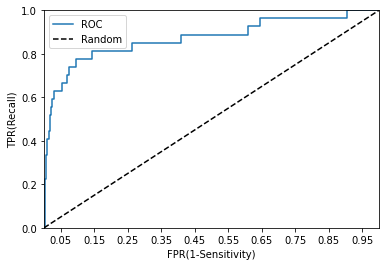

lda의 ROC AUC값: 0.8723


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(lasso_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(lasso_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(lasso_y_test, lda_clf.predict_proba(lasso_x_test)[:,1])
pred_proba = lda_clf.predict_proba(lasso_x_test)[:,1]
roc_score = roc_auc_score(lasso_y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


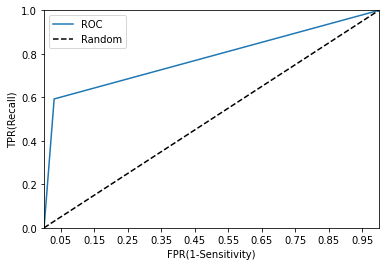

lda의 ROC AUC값: 0.7812


In [ ]:
roc_curve_plot(lasso_y_test, lda_clf.predict(lasso_x_test))
roc_score = roc_auc_score(lasso_y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

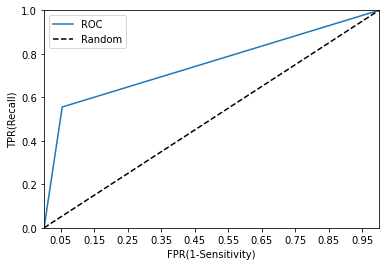

dt ROC AUC값: 0.7507


In [ ]:
roc_curve_plot(lasso_y_test, dt_clf.predict_proba(lasso_x_test)[:,1])
pred_proba = dt_clf.predict_proba(lasso_x_test)[:,1]
roc_score = roc_auc_score(lasso_y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


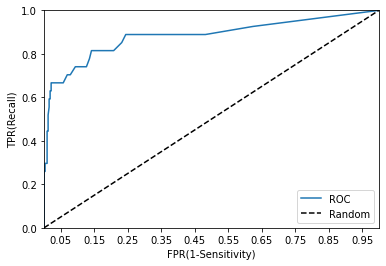

rf ROC AUC값: 0.8821


In [ ]:
roc_curve_plot(lasso_y_test, rf_clf.predict_proba(lasso_x_test)[:,1])
pred_proba = rf_clf.predict_proba(lasso_x_test)[:,1]
roc_score = roc_auc_score(lasso_y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

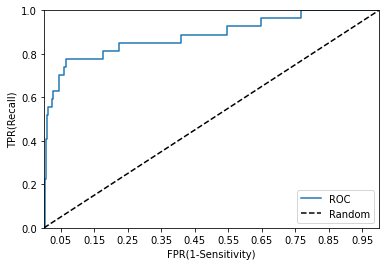

lr ROC AUC값: 0.8843


In [ ]:
roc_curve_plot(lasso_y_test, lr_clf.predict_proba(lasso_x_test)[:,1])
pred_proba = lr_clf.predict_proba(lasso_x_test)[:,1]
roc_score = roc_auc_score(lasso_y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

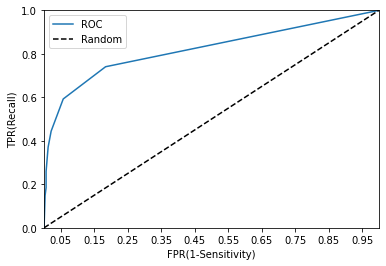

knn ROC AUC값: 0.8198


In [102]:
roc_curve_plot(lasso_y_test, knn_clf.predict_proba(lasso_x_test)[:,1])
pred_proba = knn_clf.predict_proba(lasso_x_test)[:,1]
roc_score = roc_auc_score(lasso_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))